### Import the necessary libraries

In [122]:
import pandas as pd 
import numpy  as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
import statsmodels.api as sm
import statsmodels.stats as stat
#import scipy.stats as scipy_stat
from statsmodels.formula.api import ols

### Read the data as a data frame

In [123]:
data = pd.read_csv("insurance.csv")

### Exploratory Data Analysis

#### Shape of the data

In [124]:
data.shape

(1338, 7)

Insight 
- there are 1338 Observation and 7 Feature

#### Data type of each attribute

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [126]:
print("-----------Insight---------------")
print("Attributes of the data - ", list(data.columns))
print("age :  Discrete / Numerical data")
print("sex :  Binary / Categorial data with unique values of  ", data["sex"].unique())
print("bmi :  Continuous / Numerical data")
print("children : Ordinal / Categorial data  with values", 
      np.sort(data["children"].unique())," [even it's defined as numeric] ")
print("smoker :  Binary / Categorial data with unique values of  ", data["smoker"].unique())
print("region :  Nominal / Categorial data with unique values of  ", data["region"].unique())
print("charges :  Continuous / Numerical data")

-----------Insight---------------
Attributes of the data -  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
age :  Discrete / Numerical data
sex :  Binary / Categorial data with unique values of   ['female' 'male']
bmi :  Continuous / Numerical data
children : Ordinal / Categorial data  with values [0 1 2 3 4 5]  [even it's defined as numeric] 
smoker :  Binary / Categorial data with unique values of   ['yes' 'no']
region :  Nominal / Categorial data with unique values of   ['southwest' 'southeast' 'northwest' 'northeast']
charges :  Continuous / Numerical data


#### Checking the presence of missing values

In [127]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Insight 
- Since no count listed against the attributes, there is no missing values in the data.

#### 5 point summary of numerical attributes

In [128]:
# children is considered as categorial value and so excluded
data_5Summary = data[["bmi","age","charges","children"]].describe().T 
data_5Summary["Median - Q1"] = data_5Summary["50%"] - data_5Summary["25%"]
data_5Summary["Q3 - Median"] = data_5Summary["75%"] - data_5Summary["50%"]
data_5Summary

,count,mean,std,min,25%,50%,75%,max,Median - Q1,Q3 - Median
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000,4.10375,4.293750
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000,12.00000,12.000000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801,4641.74585,7257.879515
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000,1.00000,1.000000


Insight 
* For the Charges attribute , (mean > median)  => data is right skewed or positive skewed. 
* For the BMI and AGE  => mean almost equal to median => distribution of data is symmetric. Type of the distribution can be found using visualization 
* 75% of the people have 2 or less children.

#### Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

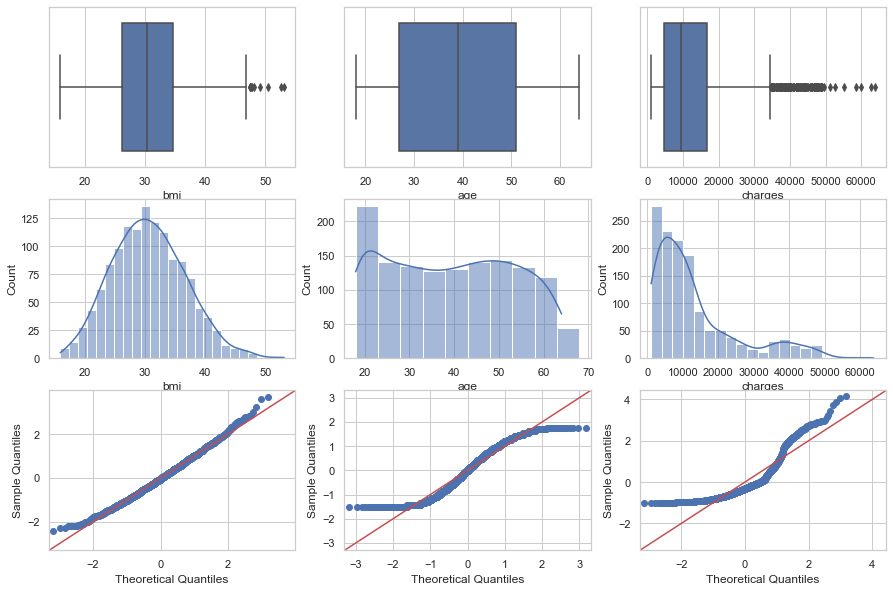

In [129]:
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(15,10))
sns.boxplot(x= "bmi",data = data,ax = ax[0,0])
sns.boxplot(x ="age",data = data,ax = ax[0,1])
sns.boxplot(x ="charges",data = data,ax = ax[0,2])
sns.histplot( x= "bmi", data = data, ax=ax[1,0],kde=True);
sns.histplot( x= "age", data = data,ax=ax[1,1],kde=True,binwidth=5);
sns.histplot( x= "charges", data = data,ax=ax[1,2],kde=True,binwidth=3000);
sm.qqplot(data["bmi"],ax=ax[2,0],line='45',fit=True)
sm.qqplot(data["age"],ax=ax[2,1],line='45',fit=True)
sm.qqplot(data["charges"],ax=ax[2,2],line='45',fit=True)
plt.show()

Insight 
* From BMI - From the Histogram and QQ plot we are able to say the data is almost normally distributed.
* For AGE - From the Histogram and QQ plot we are able to say the data is uniformly distributed.
* For Charges  - From the Histogram and QQ plot we are able to say the data is non-normally distributed with the right skewness.


#### Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ 

In [130]:
data[["bmi","age","charges"]].skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

Insights 
* BMI is less skewed and Charge is highly skewed.
* Age is uniformly distribution and very less skewed.

#### Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

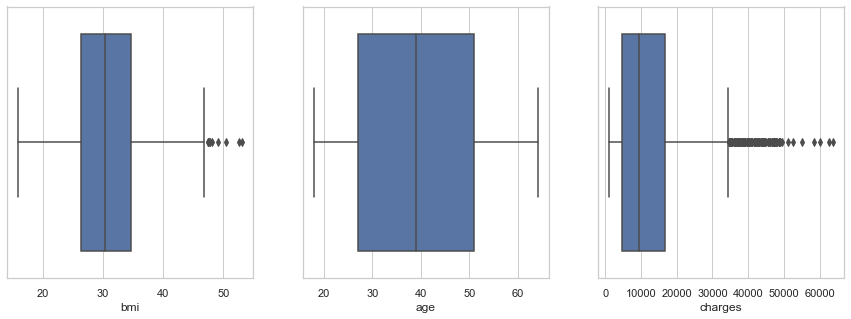

In [131]:
fig,ax = plt.subplots(ncols=3, figsize=(15,5))
sns.boxplot(x="bmi",data = data,ax=ax[0])
sns.boxplot(x="age",data = data,ax=ax[1])
sns.boxplot(x="charges",data = data,ax=ax[2])
plt.show()

Insights:
* BMI has very few outliers
* Charges has more outliers on right side.

#### Distribution of categorical columns (include children)

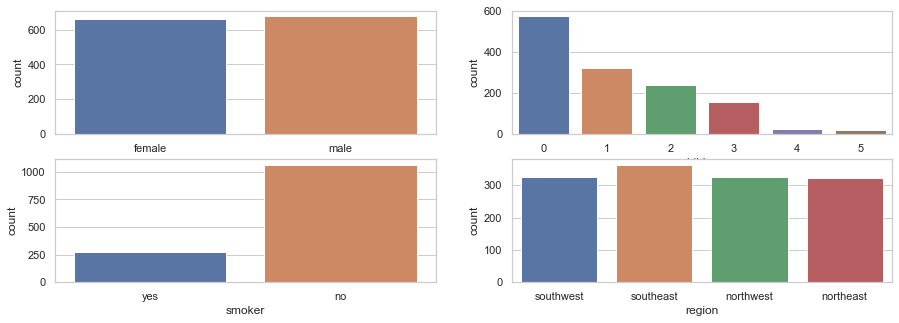

In [132]:
fig,ax = plt.subplots(nrows=2 , ncols=2, figsize=(15,5))
sns.countplot(x="sex",data = data,ax=ax[0,0])
sns.countplot(x="children",data = data,ax=ax[0,1])
sns.countplot(x="smoker",data = data,ax=ax[1,0])
sns.countplot(x="region",data = data,ax=ax[1,1])
plt.show()

Insights 
* More non-smoker data than smokers 
* For Sex and region - has almost same amount of data
* More data is with Children = 0 

#### Pair plot that includes all the columns of the data frame

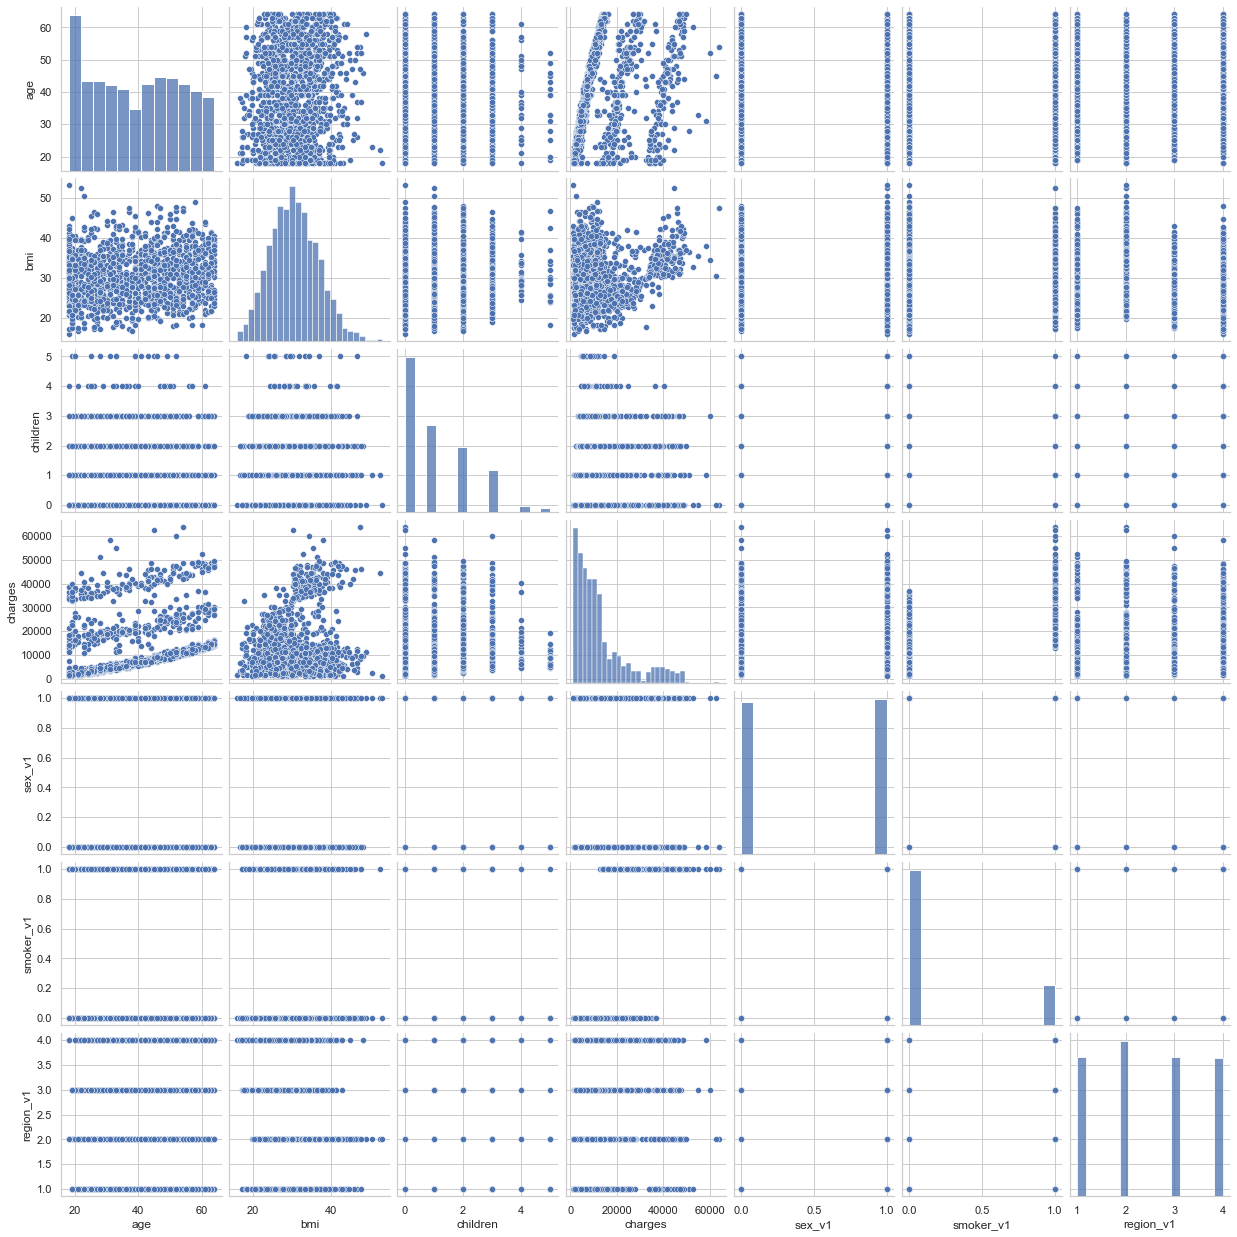

In [133]:
data["sex_v1"] = data["sex"].apply(lambda x : 1 if(x == "male") else 0)
data["smoker_v1"] = data["smoker"].apply(lambda x : 1 if(x == "yes") else 0)
data["region_v1"] = data["region"].apply(lambda x : 1 if(x == "southwest")
                                         else (2 if(x == "southeast") else (3 if(x == "northwest") else 4)))
#data.head()

sns.pairplot(data)

Insights 
* There is a linear relationship between 
    - smoker and charger - when a person is smoker charge is high
    - age and charger  - As age getting high charge is increasing.

### inferential statistics

#### Do charges of people who smoke differ significantly from the people who don't?

- Null Hypothesis (Ho) - There is no difference in the charges for smoker's and non-smoker's
- Alternate Hypothesis (Ha) - There is difference in the charges for smoker's and non-smoker's


In [134]:
## Two sample test Z- test for mean 
## Since the we are checking for equal condition in Ho - it's a two tailed test

smoker_charges = data.query("smoker == 'yes'") ["charges"]
nonsmoker_charges = data.query("smoker != 'yes'") ["charges"]

#print("Smoker Mean - ",smoker_charges.mean(),"Non Smoke mean - ",nonsmoker_charges.mean())

zstat,pvalue = stat.weightstats.ztest(smoker_charges,x2=nonsmoker_charges,alternative="two-sided")
print(zstat,pvalue)
if pvalue < 0.05:
    print("Reject null hypothesis")
else:
    print(" Failed to reject  null hypothesis")

46.664921172723716 0.0
Reject null hypothesis


##### Since p-value is less than 0.05 , at the CI of 95% we reject  null hypothesis 
     - At 95% CI there is a difference in the charges of the smoker and non-smoker
     - Smoking habit influence the charge

#### Does bmi of males differ significantly from that of females? 

- Null Hypothesis (Ho) - There is no difference in the BMI for male and female
- Alternate Hypothesis (Ha) - There is difference in the BMI for male and female


In [135]:
# Two Sample ztest for mean
# equal condition in Ho - Two-talied test
bmi_male = data.query("sex == 'male'")["bmi"]
bmi_female = data.query("sex != 'male'")["bmi"]

#print(bmi_male.mean(),bmi_female.mean())

zstat,pvalue = stat.weightstats.ztest(bmi_male,x2=bmi_female,alternative="two-sided")
print(zstat,pvalue)

if pvalue < 0.05:
    print("Reject null hypothesis")
else:
    print(" Failed to reject  null hypothesis")


1.6967526357522242 0.08974343679943912
 Failed to reject  null hypothesis


##### Since p-value is greater than 0.05 , at the CI of 95% we failed to reject  null hypothesis 
     - At 95% CI there is NO difference in the BMI of male and female
     - Gender has no influence in the BMI

#### Is the proportion of smokers significantly different in different genders?

- Null Hypothesis (Ho) - There is no difference in the propotion of male smoker and female smokers
- Alternate Hypothesis (Ha) - There is difference in the propotion of male smoker and female smokers

In [136]:
total_male = data.query("sex == 'male'")["sex"].count()
total_female = data.query("sex != 'male'")["sex"].count()
#print(total_male,total_female)

male_smoker = data.query("sex == 'male' and smoker == 'yes'")["sex"].count()
female_smoker = data.query("sex != 'male' and smoker == 'yes'")["sex"].count()
#print(male_smoker,female_smoker)

#print(male_smoker/total_male,female_smoker/total_female)

zstat,pvalue = stat.proportion.proportions_ztest([male_smoker,female_smoker],[total_male,total_female])
print(zstat,pvalue )

if pvalue < 0.05:
    print("Reject null hypothesis")
else:
    print(" Failed to reject  null hypothesis")

2.7867402154855503 0.005324114164320532
Reject null hypothesis


##### Since p-value is less than 0.05 , at the CI of 95% we reject  null hypothesis 
     - At 95% CI there is difference propotion of male smoker and female smokers
     - Gender influence smoking habit

#### Is the distribution of bmi across women with no children, one child and two children, the same?

- Null Hypothesis (Ho) - There is NO difference in the distribution BMI for women with no child, 1 child, 2 Child
- Alternate Hypothesis (Ha) - There is difference in the distribution BMI for women with no child, 1 child, 2 Child


In [137]:
# ANOVA (one-way) test is performed to check is the mean of BMI of women is same when they have 0,1,2 Child

data_avova_test = data.query("children <= 2 and sex == 'female'")
#print(data_avova_test.groupby(by=["children"]).mean())

model = ols("bmi ~ children", data=data_avova_test).fit()
stat_table = stat.anova.anova_lm(model,type=2)
#print(stat_table)
pvalue = stat_table["PR(>F)"][0]
print(pvalue)

if pvalue < 0.05:
    print("Reject null hypothesis")
else:
    print(" Failed to reject  null hypothesis")   

0.7937600294539013
 Failed to reject  null hypothesis


##### Since p-value is greater than 0.05 , at the CI of 95% we failed to reject  null hypothesis 
     - At 95% CI there is no difference in the BMI of women with 0,1,2 Child 
     - Number of Child has no effects on the BMI for women

In [138]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# print(pairwise_tukeyhsd(data_avova_test['bmi'], data_avova_test['children']))